In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
# Load the dataset
df = pd.read_csv("./data/student_depression_dataset.csv")

In [3]:
# Display first few rows
print("First 5 Rows of the DataFrame:")
print(df.head())

# Display last few rows
print("\nLast 5 Rows of the DataFrame:")
print(df.tail())

# Display shape of dataset
print(f"\nDataset Shape: {df.shape}")

# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# Check for duplicated values
print("\nDuplicated Values:", df.duplicated().sum())

df.drop(columns=["id", "City", "Degree"], inplace=True)


First 5 Rows of the DataFrame:
   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'   

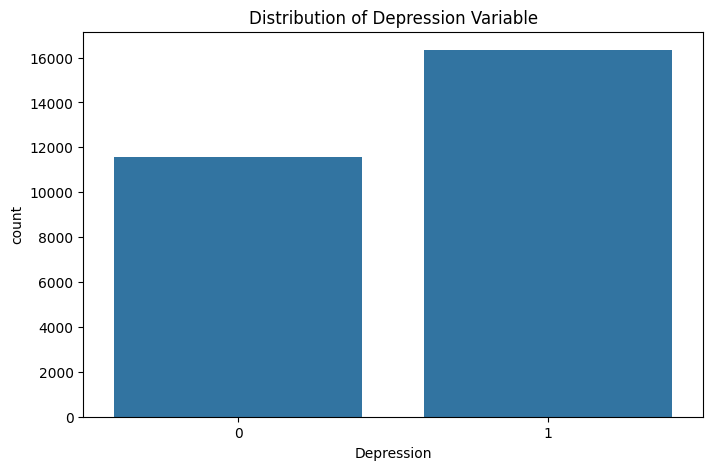

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Depression")  # use correct column name
plt.title("Distribution of Depression Variable")
plt.show()


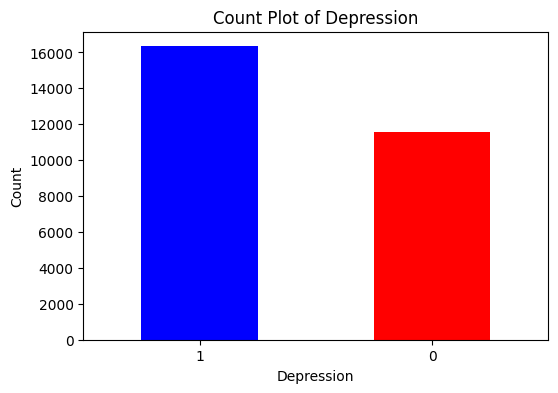

In [5]:
# Plot bar chart for Outcome distribution
plt.figure(figsize=(6, 4))
df['Depression'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Depression')
plt.ylabel('Count')
plt.title('Count Plot of Depression')
plt.xticks(rotation=0)
plt.show()


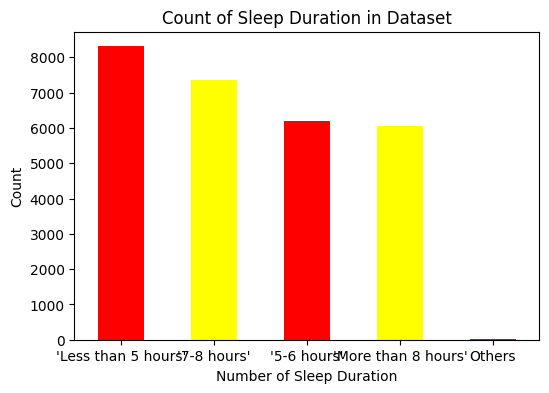

In [6]:
# Plot bar chart for Application mode distribution
plt.figure(figsize=(6,4))
df['Sleep Duration'].value_counts().plot(kind='bar', color=['red', 'yellow'])  # Customize colors
plt.xlabel('Number of Sleep Duration')
plt.ylabel('Count')
plt.title('Count of Sleep Duration in Dataset')
plt.xticks(rotation=0)   
plt.show()



In [7]:
# Detect outliers using IQR method
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Identify outliers
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()

print("\nNumber of Outliers in Numerical Features:")
print(outliers)


Number of Outliers in Numerical Features:
Age                   12
Academic Pressure      0
Work Pressure          3
CGPA                   9
Study Satisfaction     0
Job Satisfaction       8
Work/Study Hours       0
Depression             0
dtype: int64


In [8]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check column names
print("\nColumn Names:")
print(df.columns)

# Summary of dataset
print("\nDataset Summary:")
print(df.info())


Summary Statistics:
                Age  Academic Pressure  Work Pressure          CGPA  \
count  27901.000000       27901.000000   27901.000000  27901.000000   
mean      25.822300           3.141214       0.000430      7.656104   
std        4.905687           1.381465       0.043992      1.470707   
min       18.000000           0.000000       0.000000      0.000000   
25%       21.000000           2.000000       0.000000      6.290000   
50%       25.000000           3.000000       0.000000      7.770000   
75%       30.000000           4.000000       0.000000      8.920000   
max       59.000000           5.000000       5.000000     10.000000   

       Study Satisfaction  Job Satisfaction  Work/Study Hours    Depression  
count        27901.000000      27901.000000      27901.000000  27901.000000  
mean             2.943837          0.000681          7.156984      0.585499  
std              1.361148          0.044394          3.707642      0.492645  
min              0.000000  

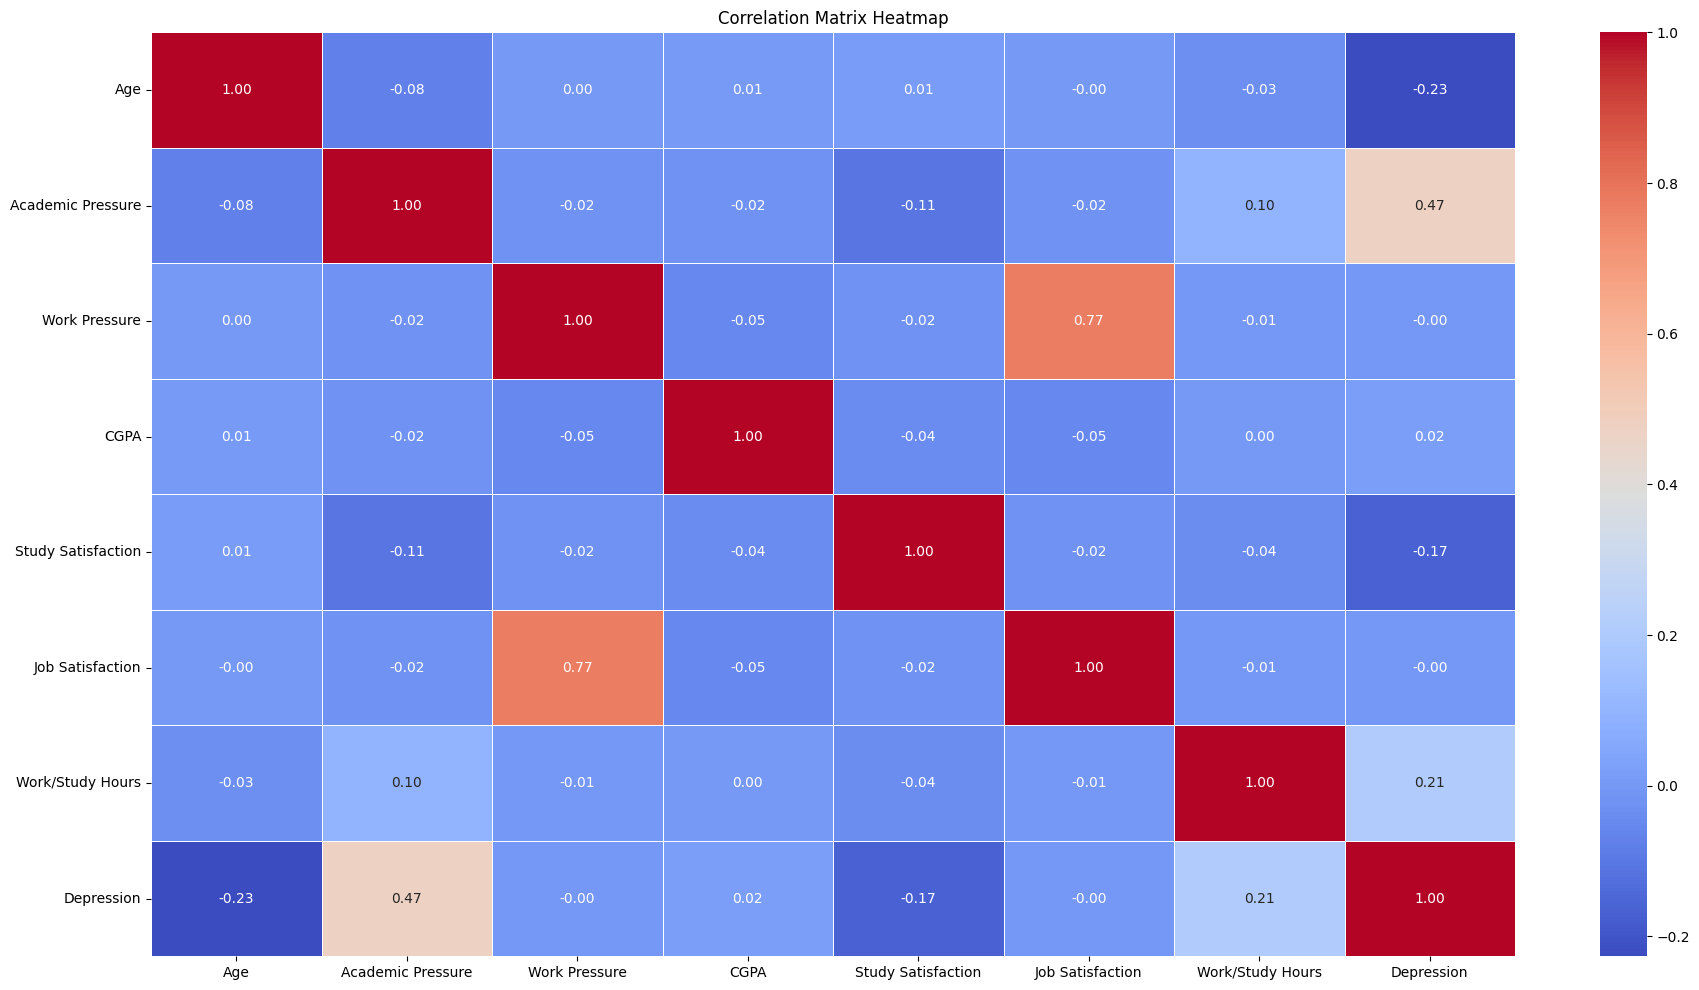

In [9]:
# Exclude non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate and plot the correlation matrix
plt.figure(figsize=(22, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

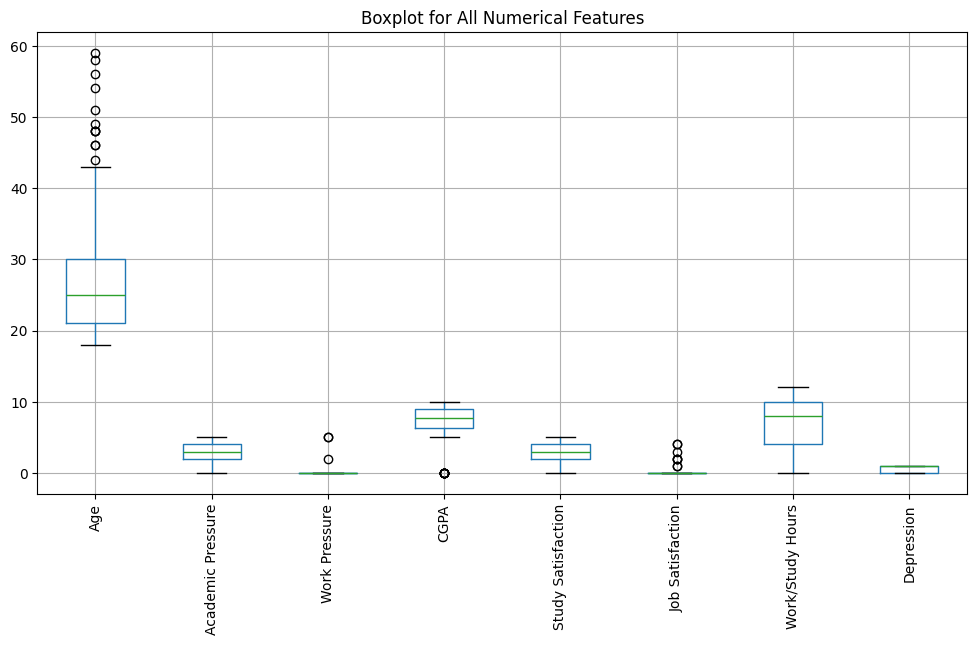

In [10]:

# Boxplot for all numerical features
plt.figure(figsize=(12, 6))
df.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot for All Numerical Features")
plt.show()

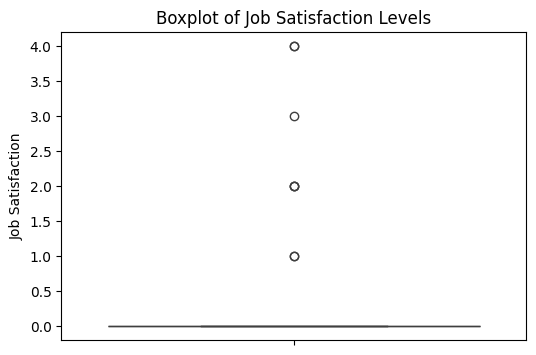

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df["Job Satisfaction"])
plt.title("Boxplot of Job Satisfaction Levels")
plt.show()


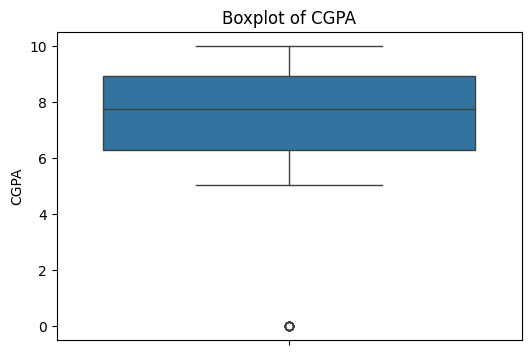

In [12]:
# Boxplot grouped by categorical variable
plt.figure(figsize=(6, 4))
sns.boxplot(y=df["CGPA"])
plt.title("Boxplot of CGPA")
plt.show()

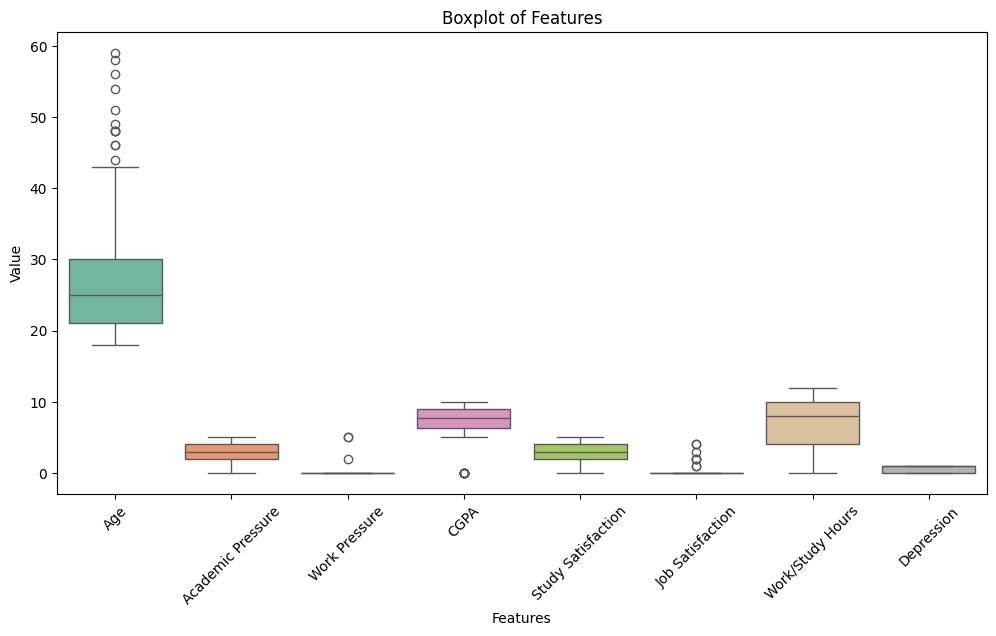

In [13]:
# Exclude non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])
# Customizing the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df, palette="Set2")
plt.title('Boxplot of Features')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


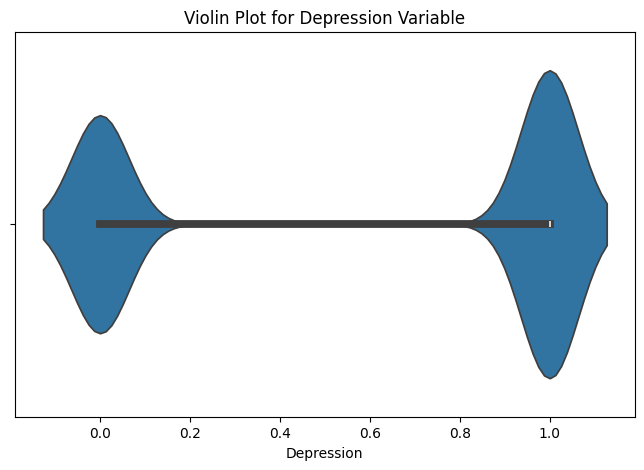

In [14]:
# Violin plot for target variable
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="Depression")
plt.title("Violin Plot for Depression Variable")
plt.show()

In [15]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [16]:
# Separate features and target variable
X = df.drop(columns=["Depression"])
y = df["Depression"]

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Normalize numerical features
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

In [19]:
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


models = {
    "XGBClassifier":XGBClassifier(),
    "LGBMClassifier":LGBMClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

best_model = None
best_score = 0
model_results = {}
best_model_instance = None

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_results[name] = accuracy

    if accuracy > best_score:
        best_score = accuracy
        best_model = name
        best_model_instance = model

# Print results
for model, score in model_results.items():
    print(f"{model}: {score:.4f}")

print(f"\nBest Model: {best_model} with accuracy: {best_score:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 13098, number of negative: 9222
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 329
[LightGBM] [Info] Number of data points in the train set: 22320, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.586828 -> initscore=0.350868
[LightGBM] [Info] Start training from score 0.350868
XGBClassifier: 0.8307
LGBMClassifier: 0.8350
Logistic Regression: 0.8364
Decision Tree: 0.7572
Random Forest: 0.8244
SVM: 0.8359

Best Model: Logistic Regression with accuracy: 0.8364


In [22]:
model_data = {
    'model': best_model_instance,
    'scaler': scaler,
    'label_encoders':label_encoders

}

joblib.dump(model_data, './model/depression_best_model.pkl')
print("Best model saved as 'depression_best_model.pkl'")

Best model saved as 'depression_best_model.pkl'


In [25]:
import joblib
import numpy as np
import pandas as pd

# Load model and scaler
model_data = joblib.load('./model/depression_best_model.pkl')
best_model = model_data['model']
scaler = model_data['scaler']
label_encoders = model_data['label_encoders']

# Original input as dictionary
input_data = {
    "Gender": "Male",
    "Age": 25.0,
    "Profession": "Software Engineer",
    "Academic Pressure": 1.0,
    "Work Pressure": 1.0,
    "CGPA": 9.2,
    "Study Satisfaction": 4.0,
    "Job Satisfaction": 4.0,
    "Sleep Duration": "7-8 hours",
    "Dietary Habits": "Healthy",
    "Have you ever had suicidal thoughts ?": "No",
    "Work/Study Hours": 6.0,
    "Financial Stress": 0.0,
    "Family History of Mental Illness": "No"
}

# Convert to DataFrame
df_input = pd.DataFrame([input_data])

for col, le in label_encoders.items():
    if col in df_input:
        try:
            df_input[col] = le.transform(df_input[col])
        except ValueError:
            # If unseen, map to a default known category (e.g., first class)
            df_input[col] = le.transform([le.classes_[0]])

# Scale and keep DataFrame with column names
scaled_input = pd.DataFrame(
    scaler.transform(df_input),
    columns=df_input.columns
)

# Predict
prediction = best_model.predict(scaled_input)

# Output
print("Prediction for input sample:",
      "Depression" if prediction[0] == 1 else
      "Non-Depression" if prediction[0] == 0 else
      "Unknown")


Prediction for input sample: Non-Depression
